# Healthcare Appointment No-Show Predictor

Step 1: Data Loading & Initial Exploration

In [2]:
# Importing Librarirs
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df=pd.read_csv('../data/raw/KaggleV2-May-2016.csv')

In [4]:
print('Total Records:',len(df))

Total Records: 110527


In [5]:
print('Total number of columns:',df.columns)

Total number of columns: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [6]:
# Display first few rows
print('First 5 rows of the dataset:')
print(df.head())

First 5 rows of the dataset:
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1        

In [7]:
# Basic information
print('Dataset Information:')
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [8]:
# Check for missing values
print('Missing Values in each column:')
print(df.isnull().sum())

Missing Values in each column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [9]:
# Basic statistics
print('Statistical Summary:')
print(df.describe())

Statistical Summary:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000 

In [10]:
# Check target variable distribution
print('Target Variable: No-show')
print(df['No-show'].value_counts())
print("\nPercentage:")
print(df['No-show'].value_counts(normalize=True) * 100)

Target Variable: No-show
No-show
No     88208
Yes    22319
Name: count, dtype: int64

Percentage:
No-show
No     79.806744
Yes    20.193256
Name: proportion, dtype: float64


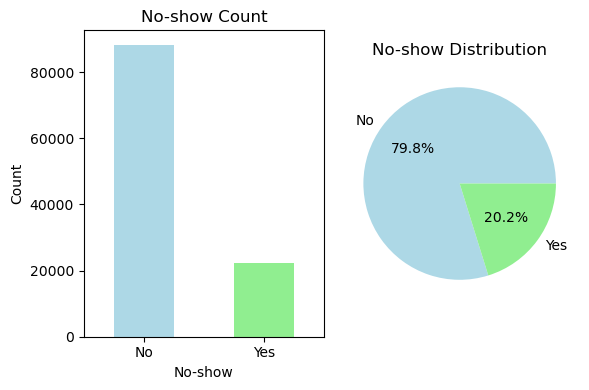

In [13]:
# Visualize target distribution
plt.figure(figsize=(6,4))   

plt.subplot(1,2,1)
df['No-show'].value_counts().plot(kind='bar', color=['lightblue','lightgreen']) 
plt.title('No-show Count')
plt.xlabel('No-show')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
df['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['lightblue','lightgreen'])
plt.title('No-show Distribution')
plt.ylabel('')

plt.tight_layout()
plt.savefig('../reports/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
print('Key Insights From Data Exploration:')

no_show_rate=(df['No-show']=='Yes').sum()/len(df)*100
show_rate=(df['No-show']=='No').sum()/len(df)*100

print('Total Appointments:',len(df))
print(f"Patients Who Showed Up: {(df['No-show'] == 'No').sum():,} ({show_rate:.1f}%)")
print(f"Patients Who Missed: {(df['No-show'] == 'Yes').sum():,} ({no_show_rate:.1f}%)")
print(f"\n No-Show Rate: {no_show_rate:.1f}% - This is what we need to reduce!")

Key Insights From Data Exploration:
Total Appointments: 110527
Patients Who Showed Up: 88,208 (79.8%)
Patients Who Missed: 22,319 (20.2%)

 No-Show Rate: 20.2% - This is what we need to reduce!
